In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting
from matplotlib.lines import lineStyles

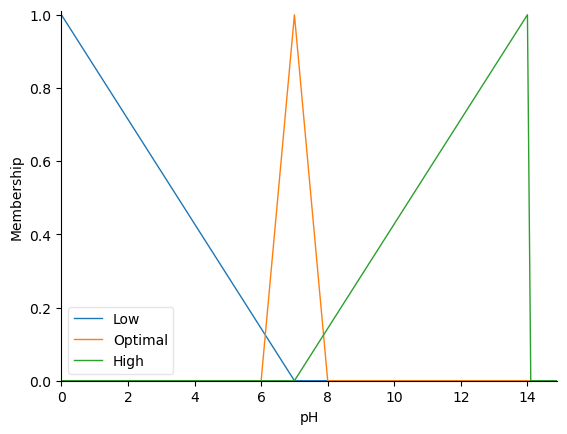

In [25]:
pH = ctrl.Antecedent(np.arange(0, 15, 0.1), 'pH')
pH['Low'] = fuzz.trimf(pH.universe, [0, 0, 7])
pH['Optimal'] = fuzz.trimf(pH.universe, [6, 7, 8])
pH['High'] = fuzz.trimf(pH.universe, [7, 14, 14])
pH.view()

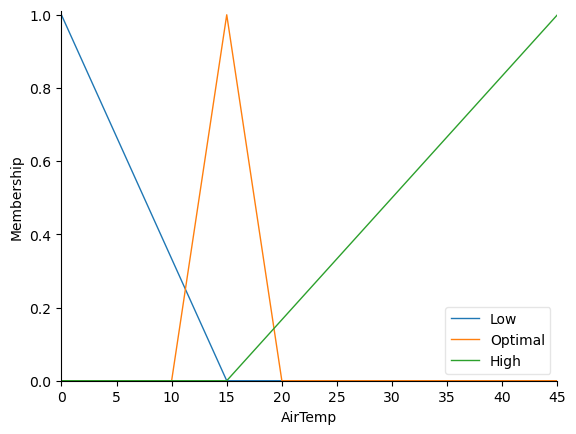

In [27]:
airTemp = ctrl.Antecedent(np.arange(0, 46, 1), 'AirTemp')
airTemp['Low'] = fuzz.trimf(airTemp.universe, [0, 0, 15])
airTemp['Optimal'] = fuzz.trimf(airTemp.universe, [10, 15, 20])
airTemp['High'] = fuzz.trimf(airTemp.universe, [15, 45, 45])
airTemp.view()

c:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


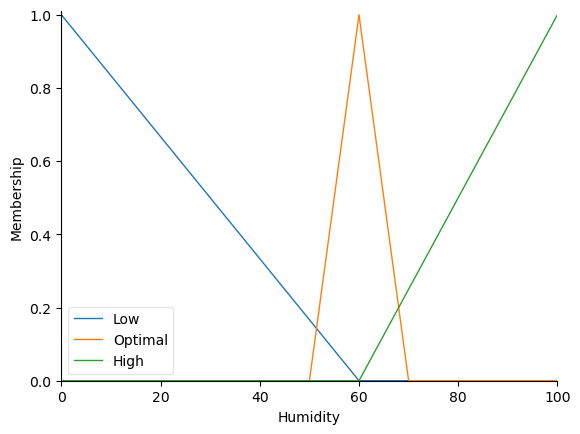

In [28]:
humidity = ctrl.Antecedent(np.arange(0,101,1), 'Humidity')
humidity['Low'] = fuzz.trimf(humidity.universe, [0, 0, 60])
humidity['Optimal'] = fuzz.trimf(humidity.universe, [50, 60, 70])
humidity['High'] = fuzz.trimf(humidity.universe, [60, 100, 100])
humidity.view()


c:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


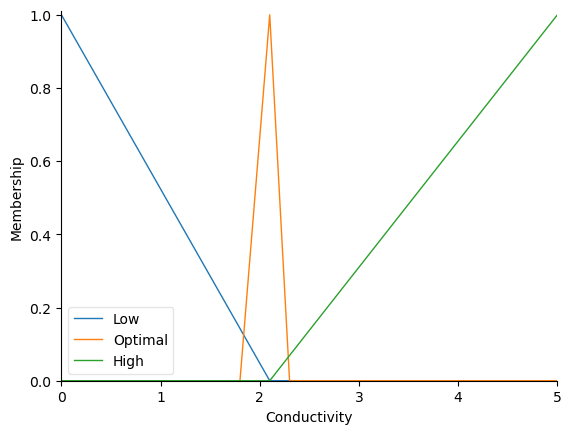

In [33]:
conductivity = ctrl.Antecedent(np.arange(0, 5.1, 0.1), 'Conductivity')
conductivity['Low'] = fuzz.trimf(conductivity.universe, [0, 0, 2.1])
conductivity['Optimal'] = fuzz.trimf(conductivity.universe, [1.8, 2.1, 2.3])
conductivity['High'] = fuzz.trimf(conductivity.universe, [2.1, 5, 5])
conductivity.view()

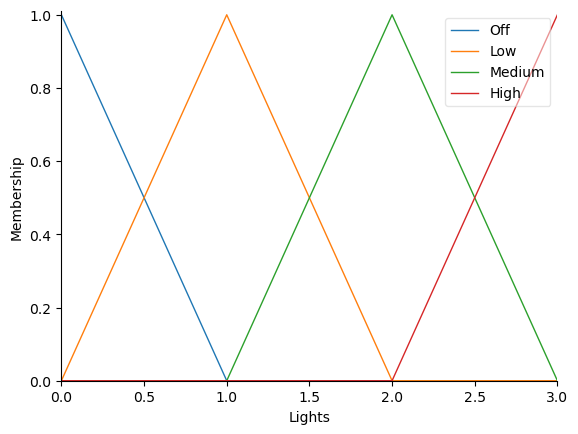

In [7]:
lights = ctrl.Consequent(np.arange(0, 4, 1), 'Lights')
lights['Off'] = fuzz.trimf(lights.universe, [0,0,1])
lights['Low'] = fuzz.trimf(lights.universe, [1,1,2])
lights['Medium'] = fuzz.trimf(lights.universe, [1,2,3])
lights['High'] = fuzz.trimf(lights.universe, [2,3,3])
lights.view()

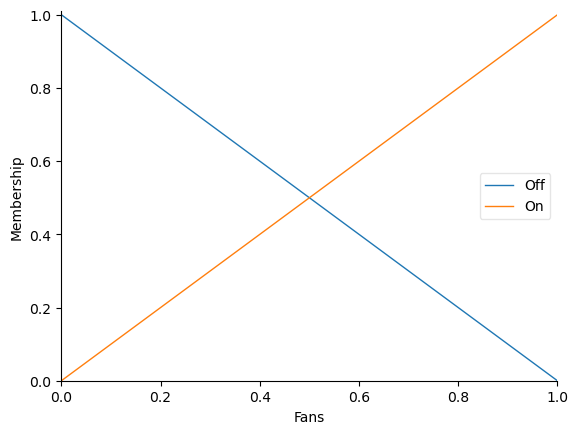

In [8]:
fans = ctrl.Consequent(np.arange(0, 2, 1), 'Fans')
fans['Off'] = fuzz.trimf(fans.universe, [0,0,1])
fans['On'] = fuzz.trimf(fans.universe, [1,1,2])
fans.view()

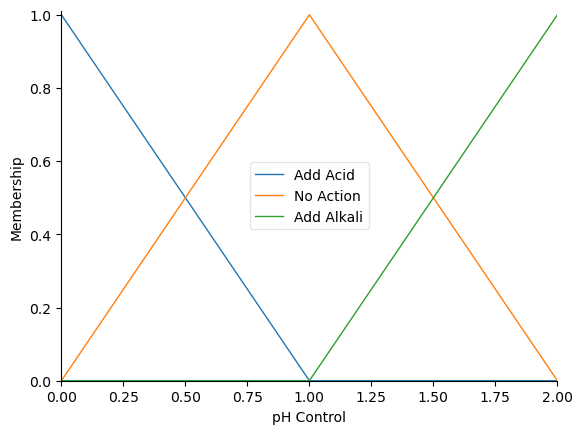

In [9]:
pH_control = ctrl.Consequent(np.arange(0, 3, 1), 'pH Control')
pH_control['Add Acid'] = fuzz.trimf(pH_control.universe, [0,0,1])
pH_control['No Action'] = fuzz.trimf(pH_control.universe, [0,1,2])
pH_control['Add Alkali'] = fuzz.trimf(pH_control.universe, [1,2,2])
pH_control.view()

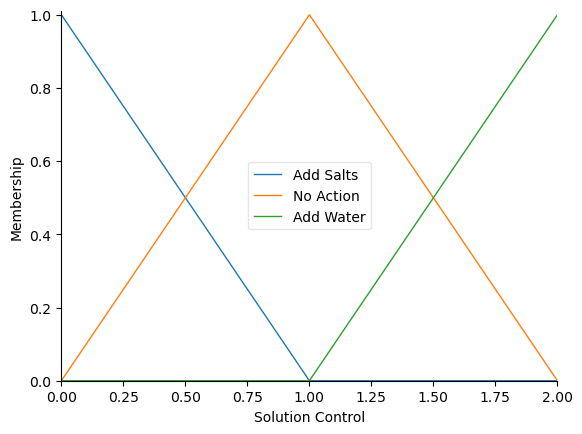

In [10]:
solution_control = ctrl.Consequent(np.arange(0, 3, 1), 'Solution Control')
solution_control['Add Salts'] = fuzz.trimf(solution_control.universe, [0,0,1])
solution_control['No Action'] = fuzz.trimf(solution_control.universe, [0,1,2])
solution_control['Add Water'] = fuzz.trimf(solution_control.universe, [1,2,2])
solution_control.view()

In [11]:
# Rules for Air temp and Humidity to adjust lights and fans
rule1 = ctrl.Rule(airTemp['Low'] & humidity['Low'], (lights['High'], fans['Off']))
rule2 = ctrl.Rule(airTemp['Optimal'] & humidity['Low'], (lights['Medium'], fans['Off']))
rule3 = ctrl.Rule(airTemp['High'] & humidity['Low'], (lights['Off'], fans['Off']))

rule4 = ctrl.Rule(airTemp['Low'] & humidity['Optimal'], (lights['Medium'], fans['Off']))
rule5 = ctrl.Rule(airTemp['Optimal'] & humidity['Optimal'], (lights['Low'], fans['Off']))
rule6 = ctrl.Rule(airTemp['High'] & humidity['Optimal'], (lights['Off'], fans['Off']))

rule7 = ctrl.Rule(airTemp['Low'] & humidity['High'], (lights['High'], fans['On']))
rule8 = ctrl.Rule(airTemp['Optimal'] & humidity['High'], (lights['Medium'], fans['On']))
rule9 = ctrl.Rule(airTemp['High'] & humidity['High'], (lights['Off'], fans['On']))

In [12]:
# Rules for pH
rule10 = ctrl.Rule(pH['Low'], pH_control['Add Alkali'])
rule11 = ctrl.Rule(pH['Optimal'], pH_control['No Action'])
rule12 = ctrl.Rule(pH['High'], pH_control['Add Acid']) 

In [13]:
# Rules for conductivity
rule13 = ctrl.Rule(conductivity['Low'], solution_control['Add Salts'])
rule14 = ctrl.Rule(conductivity['Optimal'], solution_control['No Action'])
rule15 = ctrl.Rule(conductivity['High'], solution_control['Add Water']) 

In [14]:
rules = [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15]
hydroponics_ctrl = ctrl.ControlSystem(rules)

In [15]:
test = ctrl.ControlSystemSimulation(hydroponics_ctrl, flush_after_run=15 * 15 + 1)

In [16]:
airTemp_Sample = np.linspace(0, 45, 15)
humidity_Sample = np.linspace(0, 100, 15)
pH_Sample = np.linspace(0, 14, 15)
conductivity_Sample = np.linspace(0, 5, 15)

x, y = np.meshgrid(airTemp_Sample, humidity_Sample)
a, b = np.meshgrid(pH_Sample, conductivity_Sample)
z_lights = np.zeros_like(x)
z_fans = np.zeros_like(y)
r_pH = np.zeros_like(a)
r_conductivity = np.zeros_like(b)

In [17]:
for i in range(15):
    for j in range(15):
        test.input['AirTemp'] = x[i,j]
        test.input['Humidity'] = y[i, j]
        test.input['pH'] = a[i, j]
        test.input['Conductivity'] = b[i, j]
        test.compute()
        z_lights[i, j] = test.output['Lights']
        z_fans[i, j] = test.output['Fans']
        r_pH[i,j] = test.output['pH Control']
        r_conductivity[i,j] = test.output['Solution Control']

In [18]:
def plotResults3D(x ,y, z, xlabel, ylabel, zlabel, rotation):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis',
                        linewidth=0.4, antialiased=True)

    cset = ax.contourf(x, y, z, zdir='z', offset=0, cmap='viridis', alpha=0.5)
    cset = ax.contourf(x, y, z, zdir='x', offset=0, cmap='viridis', alpha=0.5)
    cset = ax.contourf(x, y, z, zdir='y', offset=0, cmap='viridis', alpha=0.5)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)

    ax.view_init(30, rotation)

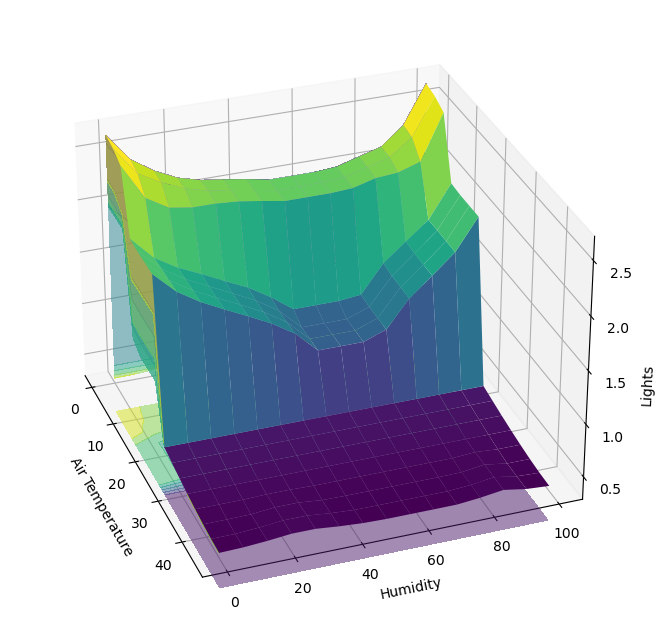

In [19]:
plotResults3D(x,y,z_lights, 'Air Temperature', 'Humidity', 'Lights', 340)

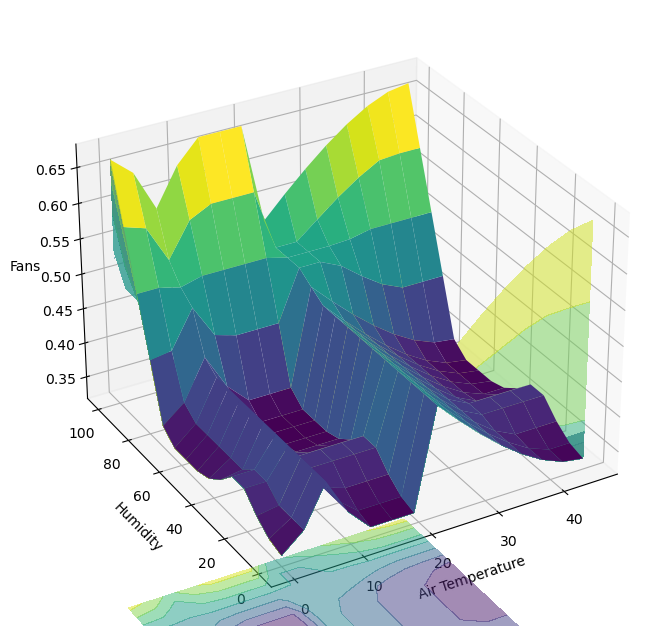

In [20]:
plotResults3D(x,y,z_fans, 'Air Temperature', 'Humidity', 'Fans', 240)

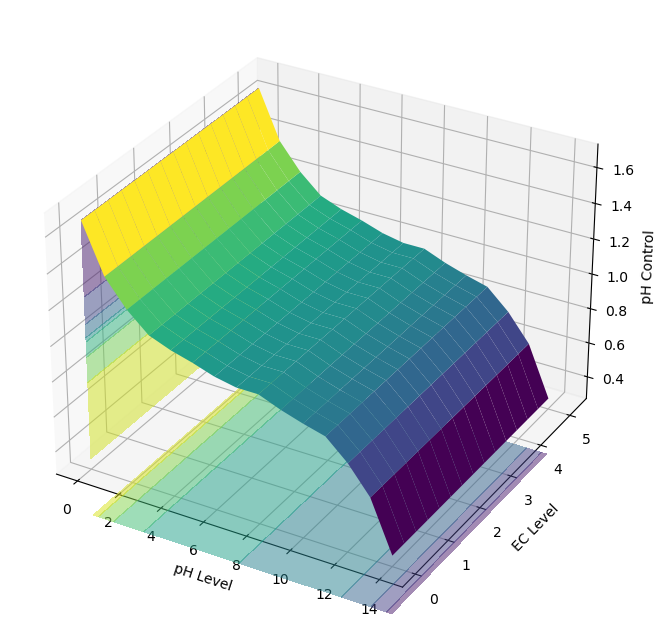

In [21]:
plotResults3D(a,b,r_pH, 'pH Level', 'EC Level', 'pH Control', 300)

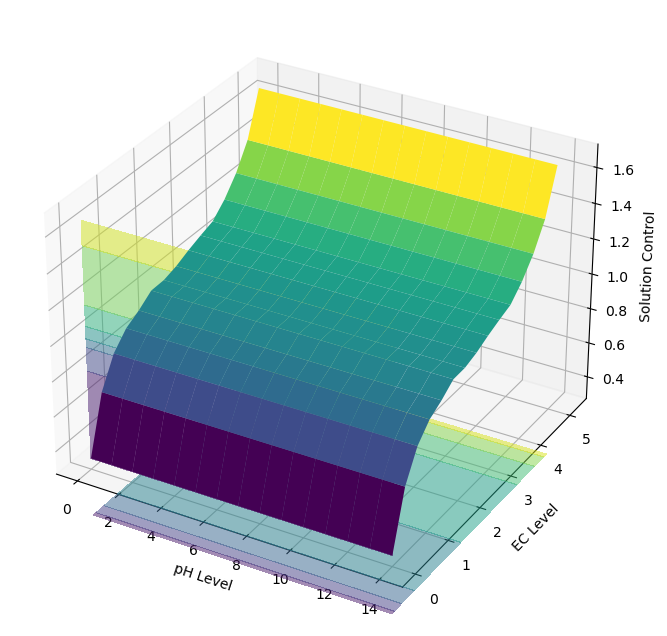

In [22]:
plotResults3D(a,b,r_conductivity, 'pH Level', 'EC Level', 'Solution Control', 300)